# Classifying Heart Disease

## A project with an aim to practice logistic regression for binary classification

Dataset comes from [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). It was cleared and prepared for the learning purposes.

Features:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* trestbpd: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* present: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

### Exploring Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv('heart_disease.csv')

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [4]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
heart['present'].value_counts()

0    164
1    139
Name: present, dtype: int64

### Data Cleaning

Two columns: 'ca' and 'thal' are of the object tipe. We will transform them into the numeric.

In [6]:
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

We will substitute unknown velues with the median

In [7]:
heart['ca'] = heart['ca'].str.replace('?', '0.0')
heart['ca'] = heart['ca'].astype(float).astype(int)
heart['ca'].value_counts()

C:\Users\Olga\AppData\Local\Temp\ipykernel_11076\2466487115.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['ca'] = heart['ca'].str.replace('?', '0.0')


0    180
1     65
2     38
3     20
Name: ca, dtype: int64

In [8]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

We will substitute unknown velues with the median

In [9]:
heart['thal'] = heart['thal'].str.replace('?', '3.0')
heart['thal'] = heart['thal'].astype(float).astype(int)
heart['thal'].value_counts()

C:\Users\Olga\AppData\Local\Temp\ipykernel_11076\4209802899.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['thal'] = heart['thal'].str.replace('?', '3.0')


3    168
7    117
6     18
Name: thal, dtype: int64

Let´s convert the categorical columns into dummies.

Categorical columns are: sex, cp, slope, thal

In [10]:
categorical_columns = ['sex', 'cp', 'slope', 'thal']
heart_dummies = pd.get_dummies(data=heart, columns=categorical_columns, drop_first=True)
heart_dummies = heart_dummies.drop(['Unnamed: 0'], axis=1)
heart_dummies

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,present,sex_1,cp_2,cp_3,cp_4,slope_2,slope_3,thal_6,thal_7
0,63,145,233,1,2,150,0,2.3,0,0,1,0,0,0,0,1,1,0
1,67,160,286,0,2,108,1,1.5,3,1,1,0,0,1,1,0,0,0
2,67,120,229,0,2,129,1,2.6,2,1,1,0,0,1,1,0,0,1
3,37,130,250,0,0,187,0,3.5,0,0,1,0,1,0,0,1,0,0
4,41,130,204,0,2,172,0,1.4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,0,0,132,0,1.2,0,1,1,0,0,0,1,0,0,1
299,68,144,193,1,0,141,0,3.4,2,1,1,0,0,1,1,0,0,1
300,57,130,131,0,0,115,1,1.2,1,1,1,0,0,1,1,0,0,1
301,57,130,236,0,2,174,0,0.0,1,1,0,1,0,0,1,0,0,0


### Predictors Selection

Let´s see how columns are related with the outcome

In [11]:
corr = abs(heart_dummies.corr())
corr['present'].sort_values()

fbs         0.025264
slope_3     0.061710
chol        0.085164
thal_6      0.104864
trestbps    0.150825
restecg     0.169202
age         0.223120
cp_2        0.248683
sex_1       0.276816
cp_3        0.315141
slope_2     0.355709
thalach     0.417167
oldpeak     0.424510
exang       0.431894
ca          0.460033
thal_7      0.480582
cp_4        0.516459
present     1.000000
Name: present, dtype: float64

Seems that the most corralation is with: 'cp_4', 'thal_7', 'ca', 'exang', 'oldpeak', 'thalach'

In [12]:
variation = heart_dummies.groupby('present').agg('mean')
variation

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,sex_1,cp_2,cp_3,cp_4,slope_2,slope_3,thal_6,thal_7
present,,,,,,,,,,,,,,,,,
0,52.585366,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,0.268293,0.560976,0.250000,0.414634,0.237805,0.298780,0.054878,0.036585,0.170732
1,56.625899,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.129496,0.820144,0.064748,0.129496,0.755396,0.654676,0.086331,0.086331,0.640288


In [13]:
not_present = variation.iloc[0,:]
present = variation.iloc[1,:]

magnitude = abs((present - not_present)*2/(present + not_present))
magnitude.sort_values(ascending=False)

ca          1.232237
exang       1.183449
cp_2        1.177143
thal_7      1.157940
cp_3        1.048049
cp_4        1.042268
oldpeak     0.914076
thal_6      0.809422
slope_2     0.746538
slope_3     0.445480
sex_1       0.375302
restecg     0.335948
thalach     0.128472
fbs         0.120794
age         0.073995
trestbps    0.040318
chol        0.035759
dtype: float64

Stratifying by the outcome influences the most the distribution of: ca, exang, cp_2, thal_7, cp_3, cp_4, oldepeak

So we wll select these predictors: ca, exang, cp_2, thal_7, cp_4, oldpeak

In [14]:
predictors = ['ca', 'exang', 'cp_2', 'cp_3','cp_4', 'thal_7', 'oldpeak']

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

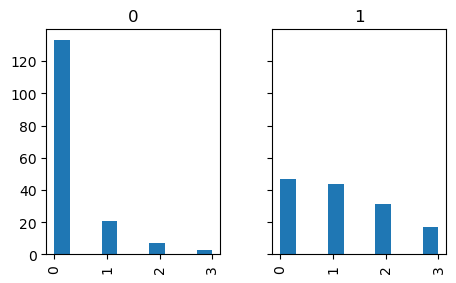

In [15]:
heart_dummies['ca'].hist(by=heart_dummies['present'], sharey=True, figsize=(5,3))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

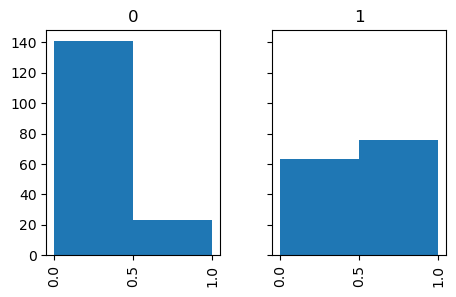

In [16]:
heart_dummies['exang'].hist(by=heart_dummies['present'], sharey=True, bins=2, figsize=(5,3))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

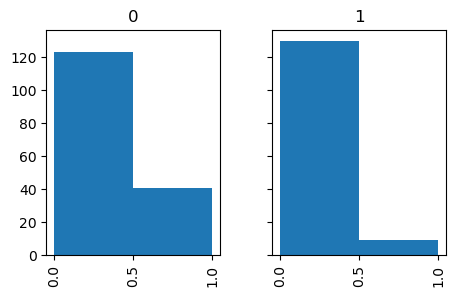

In [17]:
heart_dummies['cp_2'].hist(by=heart_dummies['present'], sharey=True, bins=2, figsize=(5,3))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

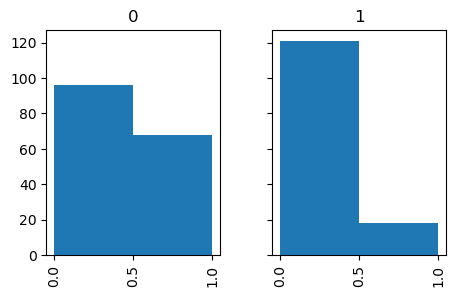

In [18]:
heart_dummies['cp_3'].hist(by=heart_dummies['present'], sharey=True, bins=2, figsize=(5,3))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

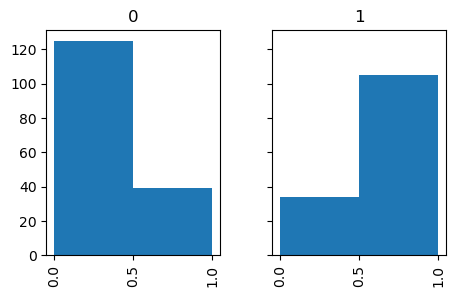

In [19]:
heart_dummies['cp_4'].hist(by=heart_dummies['present'], sharey=True, bins=2, figsize=(5,3))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

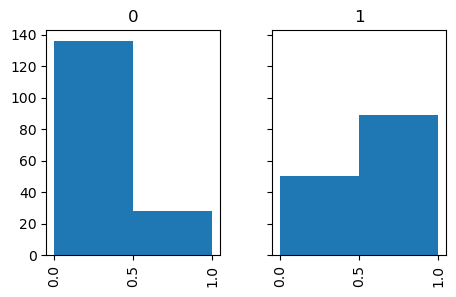

In [20]:
heart_dummies['thal_7'].hist(by=heart_dummies['present'], sharey=True, bins=2, figsize=(5,3))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

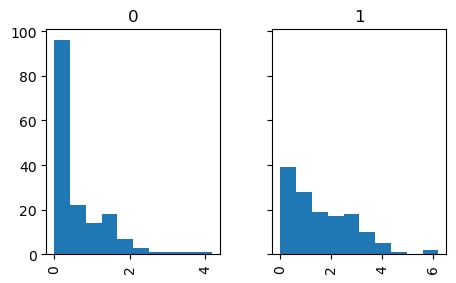

In [21]:
heart_dummies['oldpeak'].hist(by=heart_dummies['present'], sharey=True, figsize=(5,3))

### Dividing the Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = heart_dummies[predictors]
y = heart_dummies['present']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
y_train.value_counts(normalize=True)

0    0.53719
1    0.46281
Name: present, dtype: float64

In [26]:
y_test.value_counts(normalize=True)

0    0.557377
1    0.442623
Name: present, dtype: float64

The distribution of cases and non-cases is almost equal

### Buiding the Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
accuracy = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", accuracy)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8388429752066116
Training Sensitivity:  0.7857142857142857
Training Specificity:  0.8846153846153846


Specificity is higher than sensitivity which means that the model performs better for non-cases.

### Interpreting the Model Coefficients

In [30]:
coefs = predictors

# In terms of log-odds
for coef, val in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

ca : 0.98
exang : 0.9
cp_2 : -0.58
cp_3 : -0.46
cp_4 : 1.12
thal_7 : 1.41
oldpeak : 0.68


Each coefficient represent logarythm of relation between odds when the factor is present and when the factor is absent. (Odds is relation of the probabilituy of positive cases versus negative cases)

In [31]:
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

ca : 2.66
exang : 2.46
cp_2 : 0.56
cp_3 : 0.63
cp_4 : 3.07
thal_7 : 4.09
oldpeak : 1.98


Here each coefficient represent ratio between odds when the factor is present and when the factor is absent.

So presence of exercise induced angina (exang), asymptomatic chest pain type (cp_4), reversable defect (thal_7), ST depression induced by exercise relative to rest (oldpeak) and each additional major vessel colored by flourosopy (ca) is associated with higher probability of heart disease. While atypical angina chest pain type (cp_2) and non-anginal chest pain type (cp_3), with lower.
Oldpeak gives almost 100% of increase, exang and ca near 250% each one, cp_4 200% and thal_7 300%.

### Final model evaluation

In [32]:
accuracy = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", accuracy)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.819672131147541
Test Sensitivity:  0.7407407407407407
Test Specificity:  0.8823529411764706


Scores are slightly worse than that calculated from training set, but it´s expectable

### Conclusions

The model has 82% of accuracy, calculated from the test set. It´s sensitivity is 74% and specificity is 88%. So it predicts better non-cases and worse with cases.